<a href="https://colab.research.google.com/github/pravin-nawghare/Customer-Segmentation/blob/main/C_S_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does n

In [2]:
#importing all the dependiences for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import math
from google.colab import files
from dataprep.clean import clean_country
import warnings
warnings.filterwarnings('ignore')

In [3]:
org_df = pd.read_csv('/content/sample_data/sales_asia.csv', sep=';', decimal=',')
org_df.head()

,country,id,week.year,revenue,units
0,KR,702234,03.2019,808.08,1
1,KR,702234,06.2019,1606.80,2
2,KR,3618438,08.2019,803.40,1
3,KR,3618438,09.2019,803.40,1
4,KR,3618438,09.2019,803.40,1


Exploring our data

In [4]:
#finding the dtype of columns in our dataframe, so we can modify them as per our requirement
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235574 entries, 0 to 235573
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    235574 non-null  object 
 1   id         235574 non-null  int64  
 2   week.year  235574 non-null  object 
 3   revenue    235574 non-null  float64
 4   units      235574 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.0+ MB


In [5]:
#finding all nulls
org_df.isna().sum()

country      0
id           0
week.year    0
revenue      0
units        0
dtype: int64

In [6]:
org_df.describe()

,id,revenue,units
count,2.355740e+05,2.355740e+05,235574.000000
mean,3.193118e+06,2.840211e+03,8.599642
std,7.371744e+06,2.247532e+04,602.939290
min,6.000180e+05,-1.061539e+05,-150000.000000
25%,2.214396e+06,3.994800e+02,1.000000
50%,3.140856e+06,1.150320e+03,1.000000
75%,3.892650e+06,2.216160e+03,2.000000
max,2.419308e+08,2.415857e+06,150000.000000


In [7]:
#the date column shows year and weeks and it is of object type
#creating a date column in the date format
org_df['week'] = org_df['week.year'].apply(lambda x: x.split('.')[0])
org_df['year'] = org_df['week.year'].apply(lambda x: x.split('.')[1])
org_df['date'] = pd.to_datetime(org_df['year'].map(str) + org_df['week'].map(str) + '-1', format='%Y%W-%w')
org_df.head()

,country,id,week.year,revenue,units,week,year,date
0,KR,702234,03.2019,808.08,1,03,2019,2019-01-21
1,KR,702234,06.2019,1606.80,2,06,2019,2019-02-11
2,KR,3618438,08.2019,803.40,1,08,2019,2019-02-25
3,KR,3618438,09.2019,803.40,1,09,2019,2019-03-04
4,KR,3618438,09.2019,803.40,1,09,2019,2019-03-04


In [8]:
#finding the time span of data
org_df['year'].unique()

array(['2019', '2020'], dtype=object)

In [9]:
org_df1 = org_df.copy()
#revenue column is renamed for further rfm analysis
org_df1.rename({'revenue':'monetary'}, axis='columns', inplace=True)
#dropping the previous week.year column
org_df1.drop(['week.year', 'week','year'], axis='columns', inplace=True)
org_df1.head()

,country,id,monetary,units,date
0,KR,702234,808.08,1,2019-01-21
1,KR,702234,1606.80,2,2019-02-11
2,KR,3618438,803.40,1,2019-02-25
3,KR,3618438,803.40,1,2019-03-04
4,KR,3618438,803.40,1,2019-03-04


In [10]:
#checking for duplicate records
print("Duplicate records")
org_df1.duplicated().sum()

Duplicate records


2113

In [11]:
#removing duplicates from the data
org_df1.drop_duplicates(keep='first', inplace=True)
org_df1.duplicated().sum()

0

Explatory Data Analysis

In [12]:
#Finding all the countries list in our dataframe
org_df1['country'].unique()

array(['KR', 'PK', 'MM', 'VN', 'IN', 'SA', 'PH', 'AF', 'CN', 'BD', 'ID',
       'TH', 'IQ', 'MY', 'JP', 'IR', 'TR', 'UZ'], dtype=object)

In [13]:
#creating a new column to show whole name from the country code
country = clean_country(org_df1, "country")['country_clean']
org_df1['Country'] = country
org_df1.rename({'country':'country_code'}, axis='columns', inplace=True)
org_df1.head()

Country Cleaning Report:
	233461 values cleaned (100.0%)
Result contains 233461 (100.0%) values in the correct format and 0 null values (0.0%)


,country_code,id,monetary,units,date,Country
0,KR,702234,808.08,1,2019-01-21,South Korea
1,KR,702234,1606.80,2,2019-02-11,South Korea
2,KR,3618438,803.40,1,2019-02-25,South Korea
3,KR,3618438,803.40,1,2019-03-04,South Korea
5,KR,3618438,2376.42,3,2019-04-01,South Korea


In [14]:
print(f"number of countries: {org_df1['Country'].nunique()}")

number of countries: 18


In [15]:
#verifying all the countries are properly named or not
org_df1.groupby('Country')['country_code'].unique()

Country
Afghanistan     [AF]
Bangladesh      [BD]
China           [CN]
India           [IN]
Indonesia       [ID]
Iran            [IR]
Iraq            [IQ]
Japan           [JP]
Malaysia        [MY]
Myanmar         [MM]
Pakistan        [PK]
Philippines     [PH]
Saudi Arabia    [SA]
South Korea     [KR]
Thailand        [TH]
Turkey          [TR]
Uzbekistan      [UZ]
Vietnam         [VN]
Name: country_code, dtype: object

In [16]:
org_df2 = org_df1.copy()
#new column for revenue to show money in 'thousands'
org_df2['$Revenue in k']= org_df2['monetary'].apply(lambda x: round(x/1000,2))
org_df2.head()

,country_code,id,monetary,units,date,Country,$Revenue in k
0,KR,702234,808.08,1,2019-01-21,South Korea,0.81
1,KR,702234,1606.80,2,2019-02-11,South Korea,1.61
2,KR,3618438,803.40,1,2019-02-25,South Korea,0.80
3,KR,3618438,803.40,1,2019-03-04,South Korea,0.80
5,KR,3618438,2376.42,3,2019-04-01,South Korea,2.38


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

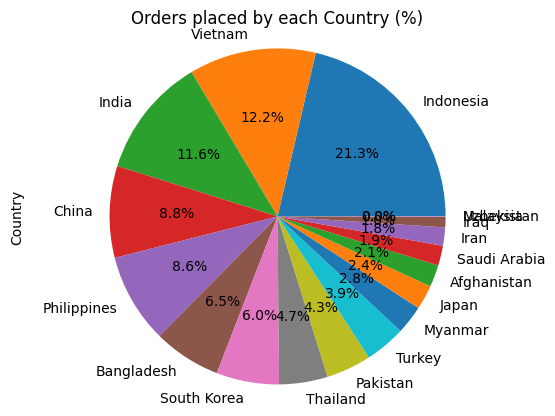

In [17]:
org_df2['Country'].value_counts(normalize=True).plot(kind='pie',autopct='%0.1f%%',radius=2.5)
plt.title("Orders placed by each Country (%)")
plt.axis('equal')

#to save the figure from colab notebook
#plt.savefig("Orders of different countries(in %).png")
#files.download("Orders of different countries(in %).png")

plt.show()

In [18]:
#Country wise revenue earned and units delivered
summ1 =round(org_df2.groupby(['Country'])['$Revenue in k', 'units'].sum(),2)
summ1

,$Revenue in k,units
Country,,
Afghanistan,2982.75,6879
Bangladesh,33271.43,37548
China,114474.85,439727
India,72306.19,103043
Indonesia,145829.75,735813
Iran,6682.14,8024
Iraq,5311.02,9931
Japan,35358.79,87224
Malaysia,124.04,135


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

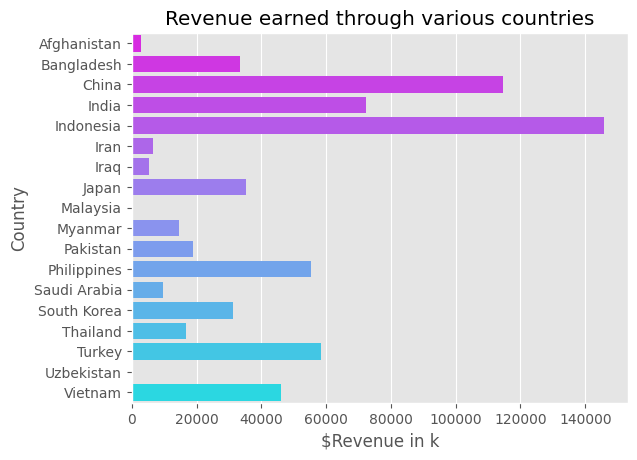

In [21]:
#visual view of above data
#'Malaysia' and 'Uzbekistan' bars are not visible (because of scale) as very less revenue is earned from these country $124.4k and $0.74k respectively

plt.style.use('ggplot')
sns.barplot(data=summ1, x='$Revenue in k', y='Country', orient='h',palette='cool_r')

plt.title("Revenue earned through various countries")

#to save file in local machine
#plt.savefig("Revenue earned through various countries.png")
#files.download("Revenue earned through various countries.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

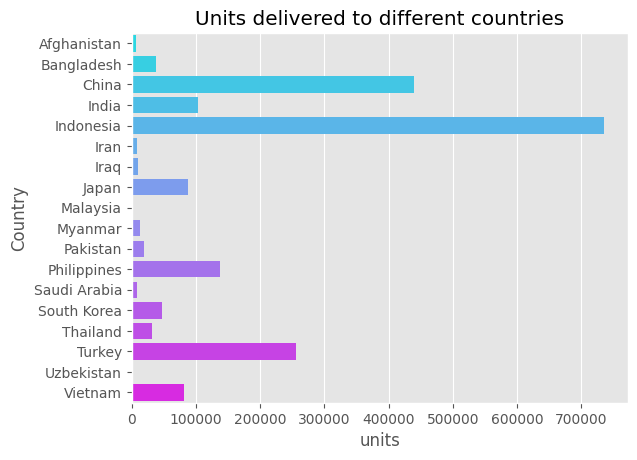

In [22]:
#Number of units delivered to different countries
#Malayasia have 124 and Uzbekistan have only 1 unit delivered in the whole time span
#Because of smaller datapoint, not visible in graph

plt.style.use('ggplot')
sns.barplot(data=summ1, x='units', y='Country', orient='h',palette='cool')

plt.title("Units delivered to different countries")

#to save file in local machine
#plt.savefig("Units delivered to different countries.png")
#files.download("Units delivered to different countries.png")

plt.show()

## **Cohort Analysis**
Cohort analysis is a form of behavioral analytics that breaks down data from a given subset, into related groups called cohorts. Instead of looking at the data as one unit, cohort analysis groups it based on similar characteristics, such as time and size.
### **Time base cohort analysis**
We are here working with time based cohort analysis. This kind of analysis puts people into the groups according to when they initially signed up as clients or users as per requirement. This can be much helpful in spotting trends in the spending habits or customer retention over time to time.

In [23]:
def get_month(x):
  return datetime(x.year, x.month, 1)

In [24]:
#setting date as start of month
org_df2['Invoice Date'] = org_df2['date'].apply(get_month)
org_df2.tail()

,country_code,id,monetary,units,date,Country,$Revenue in k,Invoice Date
235569,CN,2452476,41160.0,200,2020-07-06,China,41.16,2020-07-01
235570,CN,2452476,50856.0,400,2020-07-06,China,50.86,2020-07-01
235571,CN,2452476,79920.0,1200,2020-07-06,China,79.92,2020-07-01
235572,CN,4553904,4788.0,100,2020-07-06,China,4.79,2020-07-01
235573,CN,4553904,4188.0,100,2020-07-06,China,4.19,2020-07-01


In [25]:
#new column ID is created from original id in string format for concatenation in id+
org_df2['ID'] = org_df2['id'].astype(str)
org_df2.head()

,country_code,id,monetary,units,date,Country,$Revenue in k,Invoice Date,ID
0,KR,702234,808.08,1,2019-01-21,South Korea,0.81,2019-01-01,702234
1,KR,702234,1606.80,2,2019-02-11,South Korea,1.61,2019-02-01,702234
2,KR,3618438,803.40,1,2019-02-25,South Korea,0.80,2019-02-01,3618438
3,KR,3618438,803.40,1,2019-03-04,South Korea,0.80,2019-03-01,3618438
5,KR,3618438,2376.42,3,2019-04-01,South Korea,2.38,2019-04-01,3618438


In [26]:
#new index 'id+' is required because same id are active in different countries
# check for user id: 3790218
org_df2['id+'] = org_df2['country_code'] + org_df2['ID']
org_df2.head()

,country_code,id,monetary,units,date,Country,$Revenue in k,Invoice Date,ID,id+
0,KR,702234,808.08,1,2019-01-21,South Korea,0.81,2019-01-01,702234,KR702234
1,KR,702234,1606.80,2,2019-02-11,South Korea,1.61,2019-02-01,702234,KR702234
2,KR,3618438,803.40,1,2019-02-25,South Korea,0.80,2019-02-01,3618438,KR3618438
3,KR,3618438,803.40,1,2019-03-04,South Korea,0.80,2019-03-01,3618438,KR3618438
5,KR,3618438,2376.42,3,2019-04-01,South Korea,2.38,2019-04-01,3618438,KR3618438


In [27]:
#the cohort month contains first date of each and every customer that has placed an order
org_df2['Cohort_Month'] = org_df2.groupby('id+')['Invoice Date'].transform(min)
org_df2.tail(15)

,country_code,id,monetary,units,date,Country,$Revenue in k,Invoice Date,ID,id+,Cohort_Month
235559,CN,2452476,69840.0,2000,2020-04-06,China,69.84,2020-04-01,2452476,CN2452476,2019-07-01
235560,CN,2452476,151650.0,2500,2020-04-06,China,151.65,2020-04-01,2452476,CN2452476,2019-07-01
235561,CN,2452476,145440.0,1500,2020-04-06,China,145.44,2020-04-01,2452476,CN2452476,2019-07-01
235562,CN,2452476,6504.0,100,2020-04-06,China,6.50,2020-04-01,2452476,CN2452476,2019-07-01
235563,CN,2452476,27252.0,300,2020-04-06,China,27.25,2020-04-01,2452476,CN2452476,2019-07-01
235564,CN,2452476,25428.0,200,2020-04-06,China,25.43,2020-04-01,2452476,CN2452476,2019-07-01
235565,CN,2452476,46704.0,700,2020-04-06,China,46.70,2020-04-01,2452476,CN2452476,2019-07-01
235566,CN,2452476,16812.0,200,2020-07-06,China,16.81,2020-07-01,2452476,CN2452476,2019-07-01
235567,CN,2452476,63126.0,450,2020-07-06,China,63.13,2020-07-01,2452476,CN2452476,2019-07-01
235568,CN,2452476,12978.0,150,2020-07-06,China,12.98,2020-07-01,2452476,CN2452476,2019-07-01


In [28]:
#finding for how many months the customers are active

org_df2['Cohort_Month_diff'] = ((org_df2['Invoice Date'] - org_df2['Cohort_Month']).dt.days / 30) + 1
org_df2['Cohort_Month_diff'] = org_df2['Cohort_Month_diff'].apply(lambda x: math.floor(x))
org_df2['Cohort_Month_diff'] = org_df2['Cohort_Month_diff'].astype('int64')
org_df2.head()


,country_code,id,monetary,units,date,Country,$Revenue in k,Invoice Date,ID,id+,Cohort_Month,Cohort_Month_diff
0,KR,702234,808.08,1,2019-01-21,South Korea,0.81,2019-01-01,702234,KR702234,2019-01-01,1
1,KR,702234,1606.80,2,2019-02-11,South Korea,1.61,2019-02-01,702234,KR702234,2019-01-01,2
2,KR,3618438,803.40,1,2019-02-25,South Korea,0.80,2019-02-01,3618438,KR3618438,2019-01-01,2
3,KR,3618438,803.40,1,2019-03-04,South Korea,0.80,2019-03-01,3618438,KR3618438,2019-01-01,2
5,KR,3618438,2376.42,3,2019-04-01,South Korea,2.38,2019-04-01,3618438,KR3618438,2019-01-01,4


In [29]:
org_df2.rename({'Cohort_Month_diff':'Cohort Index'},axis='columns', inplace=True)
org_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233461 entries, 0 to 235573
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   country_code   233461 non-null  object        
 1   id             233461 non-null  int64         
 2   monetary       233461 non-null  float64       
 3   units          233461 non-null  int64         
 4   date           233461 non-null  datetime64[ns]
 5   Country        233461 non-null  object        
 6   $Revenue in k  233461 non-null  float64       
 7   Invoice Date   233461 non-null  datetime64[ns]
 8   ID             233461 non-null  object        
 9   id+            233461 non-null  object        
 10  Cohort_Month   233461 non-null  datetime64[ns]
 11  Cohort Index   233461 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 23.2+ MB


In [30]:
org_df2['Cohort Index'].unique()

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12,  3, 13, 14, 15, 16, 22,
       18, 23, 17, 19, 20, 21])

In [31]:
cohort_data = org_df2.groupby(['Cohort_Month', 'Cohort Index'])['id+'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort_Month,Cohort Index,id+
0,2019-01-01,1,4868
1,2019-01-01,2,3272
2,2019-01-01,4,2463
3,2019-01-01,5,2234
4,2019-01-01,6,2126
...,...,...,...
268,2020-09-01,2,46
269,2020-09-01,3,44
270,2020-10-01,1,383
271,2020-10-01,2,53


In [32]:
#pivot table is created for our analysis
cohort_table = cohort_data.pivot(index='Cohort_Month',columns=['Cohort Index'], values="id+")

In [33]:
cohort_table

Cohort Index,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Cohort_Month,,,,,,,,,,,,,,,,,,,,,
2019-01-01,4868.0,3272.0,NaN,2463.0,2234.0,2126.0,2306.0,1856.0,2429.0,2263.0,...,2295.0,2307.0,1669.0,1817.0,2079.0,1803.0,1867.0,1944.0,1965.0,2059.0
2019-02-01,2607.0,838.0,689.0,NaN,678.0,721.0,562.0,849.0,724.0,697.0,...,841.0,480.0,572.0,712.0,580.0,566.0,674.0,677.0,708.0,NaN
2019-03-01,1805.0,489.0,381.0,356.0,429.0,303.0,449.0,386.0,405.0,464.0,...,298.0,298.0,389.0,311.0,340.0,325.0,338.0,378.0,NaN,NaN
2019-04-01,1437.0,244.0,239.0,251.0,199.0,298.0,249.0,233.0,292.0,235.0,...,188.0,239.0,189.0,195.0,220.0,215.0,261.0,NaN,NaN,NaN
2019-05-01,925.0,151.0,137.0,95.0,170.0,144.0,151.0,135.0,133.0,145.0,...,154.0,91.0,114.0,130.0,132.0,139.0,NaN,NaN,NaN,NaN
2019-06-01,810.0,122.0,82.0,133.0,119.0,109.0,145.0,104.0,122.0,118.0,...,107.0,92.0,104.0,112.0,123.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,885.0,87.0,129.0,138.0,125.0,138.0,124.0,118.0,133.0,81.0,...,103.0,109.0,108.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,564.0,105.0,74.0,83.0,90.0,74.0,81.0,78.0,52.0,58.0,...,74.0,77.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,975.0,161.0,132.0,152.0,138.0,136.0,137.0,85.0,111.0,132.0,...,135.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
new_cohort = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort

Cohort Index,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Cohort_Month,,,,,,,,,,,,,,,,,,,,,
January 2019,1.0,0.672145,NaN,0.505957,0.458915,0.436730,0.473706,0.381265,0.498973,0.464873,...,0.471446,0.473911,0.342851,0.373254,0.427075,0.370378,0.383525,0.399343,0.403657,0.422966
February 2019,1.0,0.321442,0.264288,NaN,0.260069,0.276563,0.215573,0.325662,0.277714,0.267357,...,0.322593,0.184120,0.219409,0.273111,0.222478,0.217108,0.258535,0.259685,0.271577,NaN
March 2019,1.0,0.270914,0.211080,0.197230,0.237673,0.167867,0.248753,0.213850,0.224377,0.257064,...,0.165097,0.165097,0.215512,0.172299,0.188366,0.180055,0.187258,0.209418,NaN,NaN
April 2019,1.0,0.169798,0.166319,0.174669,0.138483,0.207376,0.173278,0.162143,0.203201,0.163535,...,0.130828,0.166319,0.131524,0.135699,0.153097,0.149617,0.181628,NaN,NaN,NaN
May 2019,1.0,0.163243,0.148108,0.102703,0.183784,0.155676,0.163243,0.145946,0.143784,0.156757,...,0.166486,0.098378,0.123243,0.140541,0.142703,0.150270,NaN,NaN,NaN,NaN
June 2019,1.0,0.150617,0.101235,0.164198,0.146914,0.134568,0.179012,0.128395,0.150617,0.145679,...,0.132099,0.113580,0.128395,0.138272,0.151852,NaN,NaN,NaN,NaN,NaN
July 2019,1.0,0.098305,0.145763,0.155932,0.141243,0.155932,0.140113,0.133333,0.150282,0.091525,...,0.116384,0.123164,0.122034,0.141243,NaN,NaN,NaN,NaN,NaN,NaN
August 2019,1.0,0.186170,0.131206,0.147163,0.159574,0.131206,0.143617,0.138298,0.092199,0.102837,...,0.131206,0.136525,0.159574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September 2019,1.0,0.165128,0.135385,0.155897,0.141538,0.139487,0.140513,0.087179,0.113846,0.135385,...,0.138462,0.151795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

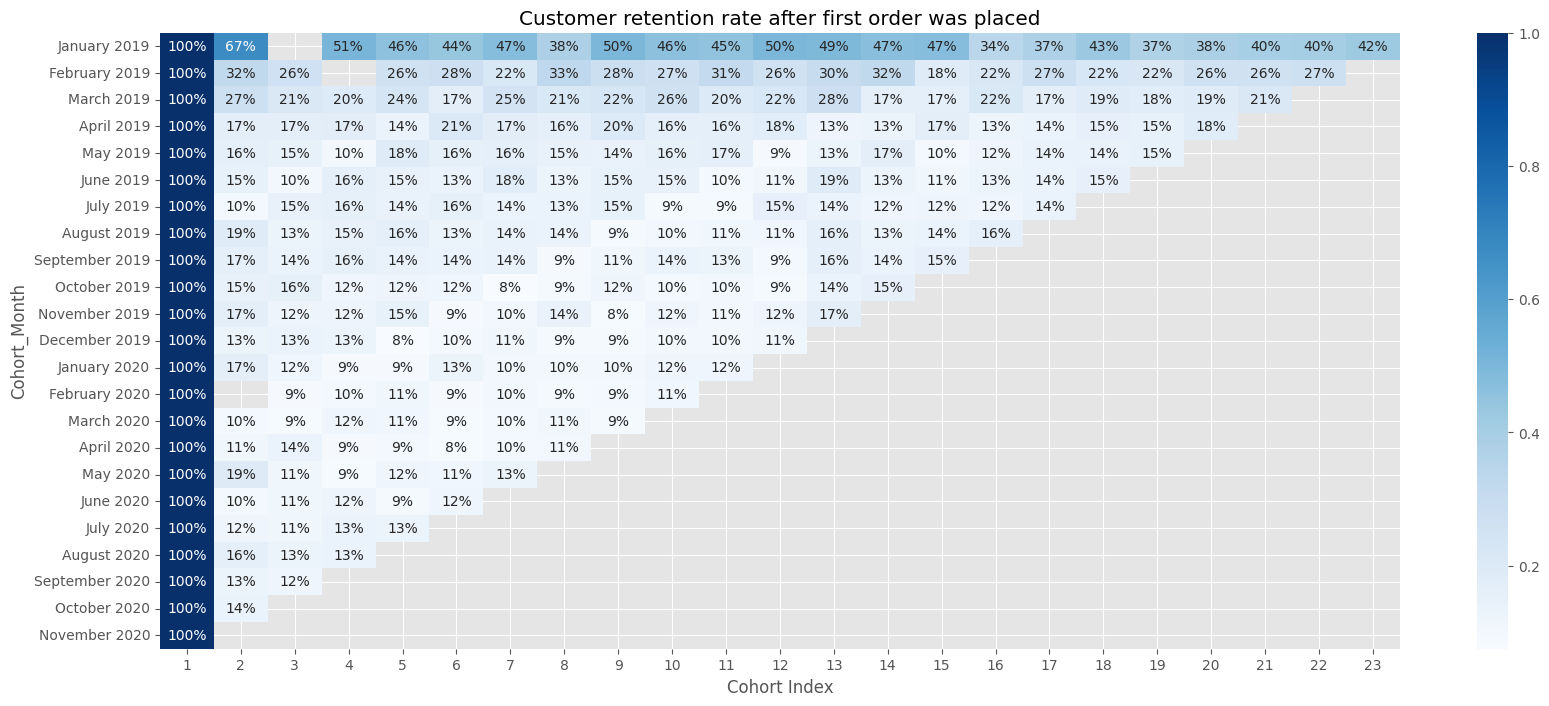

In [35]:
plt.figure(figsize=(20,8))
sns.heatmap(new_cohort, annot=True, fmt='.0%',cmap='Blues')
plt.title("Customer retention rate after first order was placed")

#to save in local machine
#plt.savefig("Cohort Analysis.png")
#files.download("Cohort Analysis.png")

plt.show()

### **RFM Analysis**
*RFM stands for recency, frequency and monetary value. This concept divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others. RFM analysis empowers enables personalized marketing, ensuring relevant engagement with different customer groups and allows you to create specific, relevant offers to the right groups of customers.*
* **Recency**: How recently has the customer made a transaction.
* **Frequency**: How frequent is the customer in ordering/buying some product.
* **Monetary**: How much does the customer spend on purchasing products.

These factors provide insights into customer engagement, lifetime value, and retention.

In [36]:
org_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233461 entries, 0 to 235573
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   country_code   233461 non-null  object        
 1   id             233461 non-null  int64         
 2   monetary       233461 non-null  float64       
 3   units          233461 non-null  int64         
 4   date           233461 non-null  datetime64[ns]
 5   Country        233461 non-null  object        
 6   $Revenue in k  233461 non-null  float64       
 7   Invoice Date   233461 non-null  datetime64[ns]
 8   ID             233461 non-null  object        
 9   id+            233461 non-null  object        
 10  Cohort_Month   233461 non-null  datetime64[ns]
 11  Cohort Index   233461 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 23.2+ MB


In [38]:
#dropping columns which are not required
org_df2.drop(['Cohort Index','Cohort_Month','ID','Invoice Date','$Revenue in k'],axis='columns',inplace=True)
org_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233461 entries, 0 to 235573
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country_code  233461 non-null  object        
 1   id            233461 non-null  int64         
 2   monetary      233461 non-null  float64       
 3   units         233461 non-null  int64         
 4   date          233461 non-null  datetime64[ns]
 5   Country       233461 non-null  object        
 6   id+           233461 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 14.2+ MB


In [39]:
#finding the span of dataframe for our analysis
print(f"time period of dataset starts from: {org_df1['date'].min()}")
print(f"time period of dataset ends at: {org_df1['date'].max()}")

time period of dataset starts from: 2019-01-07 00:00:00
time period of dataset ends at: 2020-11-30 00:00:00


In [40]:
#new index with date column
org_df3 = org_df2.copy()
org_df3.set_index("date",inplace=True)
org_df3.head()

,country_code,id,monetary,units,Country,id+
date,,,,,,
2019-01-21,KR,702234,808.08,1,South Korea,KR702234
2019-02-11,KR,702234,1606.80,2,South Korea,KR702234
2019-02-25,KR,3618438,803.40,1,South Korea,KR3618438
2019-03-04,KR,3618438,803.40,1,South Korea,KR3618438
2019-04-01,KR,3618438,2376.42,3,South Korea,KR3618438


In [41]:
org_df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233461 entries, 2019-01-21 to 2020-07-06
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  233461 non-null  object 
 1   id            233461 non-null  int64  
 2   monetary      233461 non-null  float64
 3   units         233461 non-null  int64  
 4   Country       233461 non-null  object 
 5   id+           233461 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.5+ MB


In [42]:
#for monthly analysis index is set for month
org_df3a = org_df3.to_period("M")
org_df3a.head()

,country_code,id,monetary,units,Country,id+
date,,,,,,
2019-01,KR,702234,808.08,1,South Korea,KR702234
2019-02,KR,702234,1606.80,2,South Korea,KR702234
2019-02,KR,3618438,803.40,1,South Korea,KR3618438
2019-03,KR,3618438,803.40,1,South Korea,KR3618438
2019-04,KR,3618438,2376.42,3,South Korea,KR3618438


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

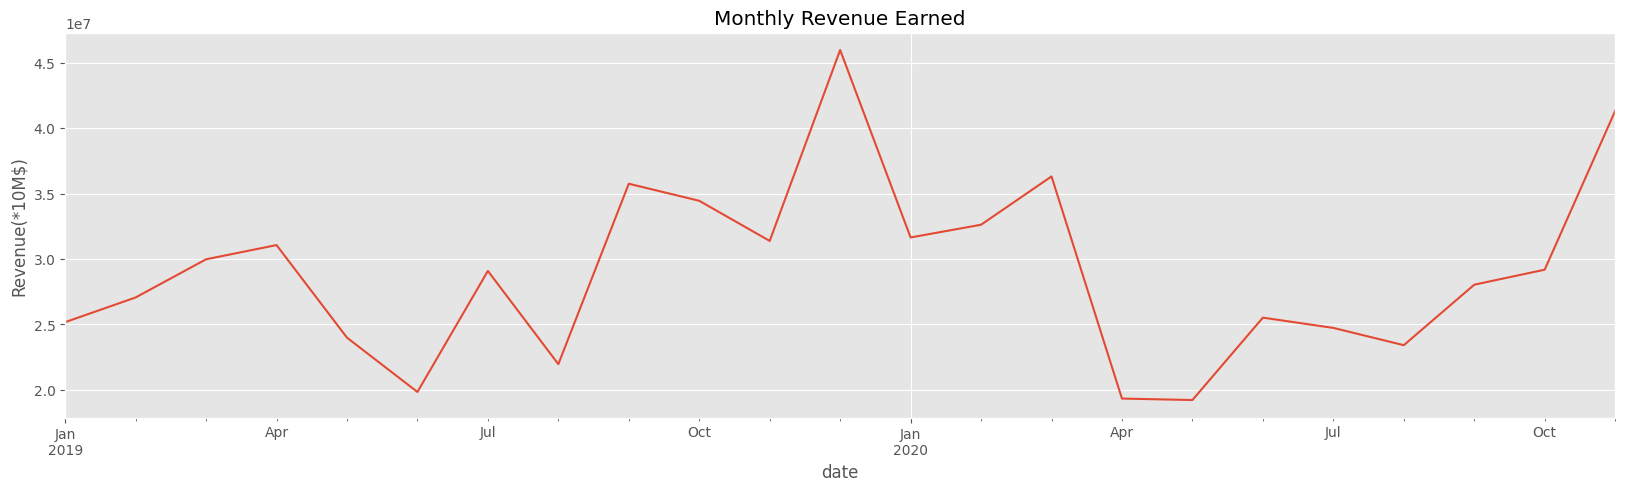

In [43]:
plt.style.use('ggplot')
org_df3a['monetary'].groupby('date').agg(sum).plot(figsize=(20,5))
plt.title("Monthly Revenue Earned")
plt.ylabel("Revenue(*10M$)")

#save the file to local machine
#plt.savefig("Monthly Revenue.png")
#files.download("Monthly Revenue.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

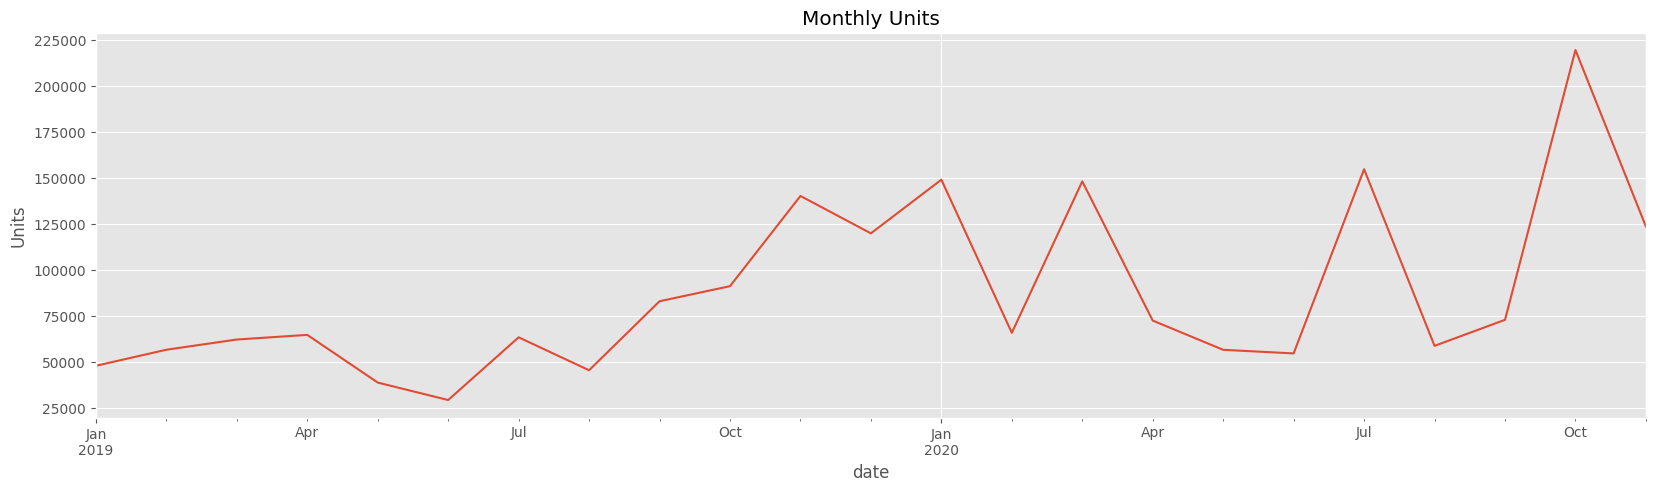

In [44]:
plt.style.use('ggplot')
org_df3a['units'].groupby('date').agg(sum).plot(figsize=(20,5))
plt.title("Monthly Units")
plt.ylabel("Units")

#saving file to local machine
#plt.savefig("Monthly Units delivered.png")
#files.download("Monthly Units delivered.png")

plt.show()

In [45]:
#one day after order placed
#so the customer is now active for atleast 1 day if only a single order is placed
NOW = org_df2['date'].max() + timedelta(days=1)
NOW

Timestamp('2020-12-01 00:00:00')

In [46]:
#recency, to find days since last purchase
recency = org_df2.groupby(['id+']).agg({'date': lambda x: ((NOW-x.max()).days)})
recency


,date
id+,
AF186035892,232
AF186035934,561
AF1915092,1
AF1915452,505
AF1915920,323
...,...
VN993528,1
VN993996,127
VN995010,197


In [47]:
#frequency, to find recurring customer and how many times they ordered
frequency = org_df2.groupby(['id+'])['date'].count()
frequency

id+
AF186035892      1
AF186035934      1
AF1915092      331
AF1915452        6
AF1915920        1
              ... 
VN993528         5
VN993996         2
VN995010         1
VN998088         2
VN998130         2
Name: date, Length: 21849, dtype: int64

In [48]:
#monetary, sum of money spent by the customer
money = org_df2.groupby(['id+'])['monetary'].sum()
money

id+
AF186035892       277.86
AF186035934       184.62
AF1915092      545930.76
AF1915452        2314.92
AF1915920        2238.60
                 ...    
VN993528         3982.56
VN993996         4037.28
VN995010          544.32
VN998088         1002.30
VN998130          769.68
Name: monetary, Length: 21849, dtype: float64

In [49]:
#Renaming the columns
recency.columns=['Recency']
frequency.columns=['Frequency']
money.columns=['Monetary']

#new df with above columns is created
RFM = pd.concat([recency,frequency,money],axis='columns')
RFM.head()

,Recency,date,monetary
id+,,,
AF186035892,232,1,277.86
AF186035934,561,1,184.62
AF1915092,1,331,545930.76
AF1915452,505,6,2314.92
AF1915920,323,1,2238.60


In [50]:
#Renaming the columns of df
RFM.rename(columns={'date':'Frequency','monetary':'Monetary'}, inplace=True)
RFM.head()


,Recency,Frequency,Monetary
id+,,,
AF186035892,232,1,277.86
AF186035934,561,1,184.62
AF1915092,1,331,545930.76
AF1915452,505,6,2314.92
AF1915920,323,1,2238.60


In [51]:
RFM.describe()

,Recency,Frequency,Monetary
count,21849.000000,21849.000000,2.184900e+04
mean,216.888279,10.685203,3.052257e+04
std,205.303483,47.203158,5.115853e+05
min,1.000000,1.000000,-4.755684e+04
25%,36.000000,1.000000,1.207380e+03
50%,148.000000,3.000000,3.700440e+03
75%,358.000000,9.000000,1.351956e+04
max,694.000000,2933.000000,5.977319e+07


In [52]:
#we assign a rate from 1-5 on the basis of 'r', 'f', and 'm' values.
#we will use quantile method to divide every feature in groups containing 20% of samples
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 22.0, 0.4: 85.0, 0.6: 232.0, 0.8: 414.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 4.0, 0.8: 12.0},
 'Monetary': {0.2: 1055.1, 0.4: 2424.12, 0.6: 6078.732, 0.8: 18730.524}}

In [54]:
# Assigning scores from 1 to 5
# Higher values are better for frequency and monetary, while lower values are better for recency

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

In [55]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [56]:
# We asssign R, F and M scores to each customer

RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
RFM.head()

,Recency,Frequency,Monetary,R,F,M
id+,,,,,,
AF186035892,232,1,277.86,3,1,1
AF186035934,561,1,184.62,1,1,1
AF1915092,1,331,545930.76,5,5,5
AF1915452,505,6,2314.92,1,4,2
AF1915920,323,1,2238.60,2,1,2


### **Segment Description**
* **Champions**: Bought recently, buy often, and spend the most.
* **Frequent** Shoppers: Buy on a regular basis and are responsive to promotions.
* **Recent Engagers**: Recent customers with average frequency.
* **Occasional Buyers**: Bought most recently, but not often.
* **Exploratory Visitors**: Recent shoppers who haven’t spent much.
* **High-Value Prospects**: Above-average recency, frequency, and monetary values. May not have bought very recently though.
* **At-Risk Customers**: Below-average recency and frequency. We need to reactivate them.
*  **Lapsed Loyalists**: Purchased often but a long time ago. We need to bring them back!
* **Dormant Clients**: Used to purchase frequently but haven’t returned for a long time.
*  **Ghost Clients**: Purchased a long time ago and never came back.

In [57]:
#mapping the segment description according to the rank given on the basis of rfm score
#the ranks are calculated by the excel formula 'percentrank.inc'
#Percentrank.inc: Returns the rank of a value in a data set as a percentage (0..1, inclusive) of the data set.

#Suppose a list of numbers is provided and we have to evaluate the relative standing of a value within a data set.
#x = 13,12,11,8,4,3,2,1,1,1
#Percent rank of 2 in the series is: 0.333, because 3 values in the set are smaller than 2, and 6 are larger than 2 (3/(3+6)=0.333)


def mapping(row):
  if ((row['score'] == 3) or (row['score'] == 4)):
    return 'Ghost Clients'
  if row['score'] == 5:
    return 'Dormant Clients'
  if row['score'] == 6:
    return 'Lapsed Loyalists'
  if row['score'] == 7:
    return 'At-risk Customers'
  if ((row['score'] == 8) or (row['score'] == 9)):
    return 'High-value Prospects'
  if row['score'] == 10:
    return 'Exploratory Visitors'
  if row['score'] == 11:
    return 'Occasional Buyers'
  if ((row['score'] == 12) or (row['score'] == 13)):
    return 'Recent Engagers'
  if row['score'] == 14:
    return 'Frequent Shoppers'
  else:
    return 'Champions'

In [58]:
RFM['score'] = RFM['R'] + RFM['F'] + RFM['M']
RFM['Segment'] = RFM.apply(mapping,axis='columns')
RFM.head()

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
AF186035892,232,1,277.86,3,1,1,5,Dormant Clients
AF186035934,561,1,184.62,1,1,1,3,Ghost Clients
AF1915092,1,331,545930.76,5,5,5,15,Champions
AF1915452,505,6,2314.92,1,4,2,7,At-risk Customers
AF1915920,323,1,2238.60,2,1,2,5,Dormant Clients


**Exploring the Customer Segment**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

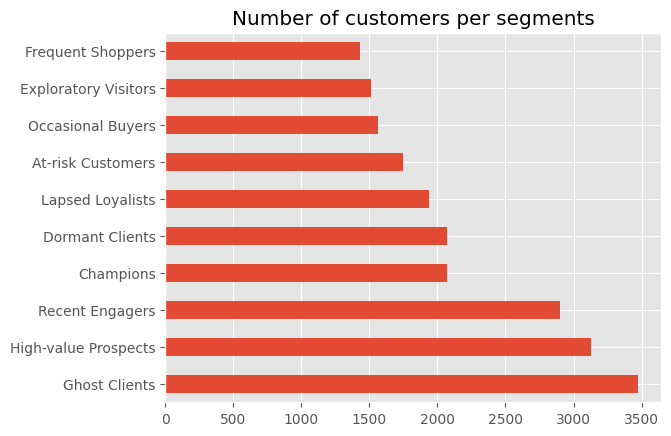

In [60]:
plt.style.use("ggplot")
RFM['Segment'].value_counts().plot(kind='barh')
plt.title("Number of customers per segments")

#save the file to local machine
#plt.savefig("Number of customers per segment.png")
#files.download("Number of customers per segment.png")

plt.show()

In [61]:
RFM.groupby(['Segment'])[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Segment,,,
At-risk Customers,242.550086,2.050944,3853.148861
Champions,8.742885,59.252291,221359.582026
Dormant Clients,351.321101,1.292129,1457.374708
Exploratory Visitors,149.484148,5.022457,7657.312946
Frequent Shoppers,30.510475,23.923184,48248.698492
Ghost Clients,503.983871,1.044643,811.680709
High-value Prospects,200.716794,3.185185,5844.142644
Lapsed Loyalists,285.706337,1.577022,2260.045904
Occasional Buyers,112.812261,6.839080,11236.257663


In [62]:
RFM[RFM['Segment']=="Lapsed Loyalists"].sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
PK2720262,540,1,18640.20,1,1,4,6,Lapsed Loyalists
ID3985092,491,1,18553.20,1,1,4,6,Lapsed Loyalists
CN646110,680,1,17538.84,1,1,4,6,Lapsed Loyalists
ID3672054,428,1,16931.88,1,1,4,6,Lapsed Loyalists
ID4331568,519,1,16865.16,1,1,4,6,Lapsed Loyalists
CN1146726,561,1,16689.24,1,1,4,6,Lapsed Loyalists
TR4427292,526,1,16093.74,1,1,4,6,Lapsed Loyalists
CN954786,477,1,15580.74,1,1,4,6,Lapsed Loyalists
PH3822534,624,1,15296.22,1,1,4,6,Lapsed Loyalists


In [63]:
RFM[RFM['Segment']=="Exploratory Visitors"].sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
BD3880194,225,2,298653.24,3,2,5,10,Exploratory Visitors
TR3593910,330,3,126944.52,2,3,5,10,Exploratory Visitors
CN918828,484,7,107769.78,1,4,5,10,Exploratory Visitors
ID3561900,120,2,61927.14,3,2,5,10,Exploratory Visitors
TR3740370,253,4,47854.50,2,3,5,10,Exploratory Visitors
JP2499522,288,3,47273.40,2,3,5,10,Exploratory Visitors
PK3674382,344,4,42799.98,2,3,5,10,Exploratory Visitors
IN2202726,372,3,42434.28,2,3,5,10,Exploratory Visitors
IN4410456,463,10,39589.08,1,4,5,10,Exploratory Visitors


In [64]:
RFM[RFM['Segment']=="High-value Prospects"].sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
TR4358328,575,3,920949.78,1,3,5,9,High-value Prospects
IQ2691852,554,3,734101.68,1,3,5,9,High-value Prospects
IN3595482,358,1,268358.94,2,1,5,8,High-value Prospects
JP4040448,239,2,122407.44,2,2,5,9,High-value Prospects
IN1804974,414,2,94857.54,2,2,5,9,High-value Prospects
BD2538138,288,2,94367.22,2,2,5,9,High-value Prospects
IN2988348,148,1,87074.70,3,1,5,9,High-value Prospects
PH1184988,330,2,79970.46,2,2,5,9,High-value Prospects
CN991062,253,1,73242.00,2,1,5,8,High-value Prospects


In [65]:
RFM[RFM['Segment']=="Recent Engagers"].sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
TR4422780,92,47,5617110.84,3,5,5,13,Recent Engagers
JP2115414,141,189,3184590.30,3,5,5,13,Recent Engagers
CN2452476,148,35,1688766.00,3,5,5,13,Recent Engagers
TR3248568,64,5,1091834.04,4,4,5,13,Recent Engagers
IQ4264722,239,285,674725.38,2,5,5,12,Recent Engagers
BD2647434,239,29,620488.98,2,5,5,12,Recent Engagers
IQ1985592,78,8,530785.80,4,4,5,13,Recent Engagers
JP4096386,260,367,489625.98,2,5,5,12,Recent Engagers
BD2786850,162,18,419488.08,3,5,5,13,Recent Engagers


In [66]:
RFM[RFM['Segment']=="Frequent Shoppers"].sort_values(by='Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
JP2182446,29,29,1596771.00,4,5,5,14,Frequent Shoppers
BD3683844,29,37,1512710.82,4,5,5,14,Frequent Shoppers
PK4041366,50,23,1442305.80,4,5,5,14,Frequent Shoppers
IN4427148,29,32,1334208.54,4,5,5,14,Frequent Shoppers
ID3983442,29,102,1331658.48,4,5,5,14,Frequent Shoppers
PH3649728,29,151,989486.28,4,5,5,14,Frequent Shoppers
TH1974372,71,18,765743.46,4,5,5,14,Frequent Shoppers
TR4153698,29,79,725497.08,4,5,5,14,Frequent Shoppers
ID4332210,43,53,645380.16,4,5,5,14,Frequent Shoppers


In [67]:
# Customers with monetary over the average that are at risk

RFM[(RFM['Monetary'] > RFM['Monetary'].mean()) & (RFM['Segment']=='At-risk Customers')]\
    .sort_values(by='Monetary', ascending=False)

,Recency,Frequency,Monetary,R,F,M,score,Segment
id+,,,,,,,,
ID4268382,687,1,1152000.00,1,1,5,7,At-risk Customers
ID2927664,484,1,91228.50,1,1,5,7,At-risk Customers
JP3678660,687,1,45643.44,1,1,5,7,At-risk Customers
BD2573580,484,1,42580.08,1,1,5,7,At-risk Customers
BD2569290,428,1,41817.30,1,1,5,7,At-risk Customers
CN1188852,687,1,41741.70,1,1,5,7,At-risk Customers
CN648888,603,1,30918.72,1,1,5,7,At-risk Customers


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

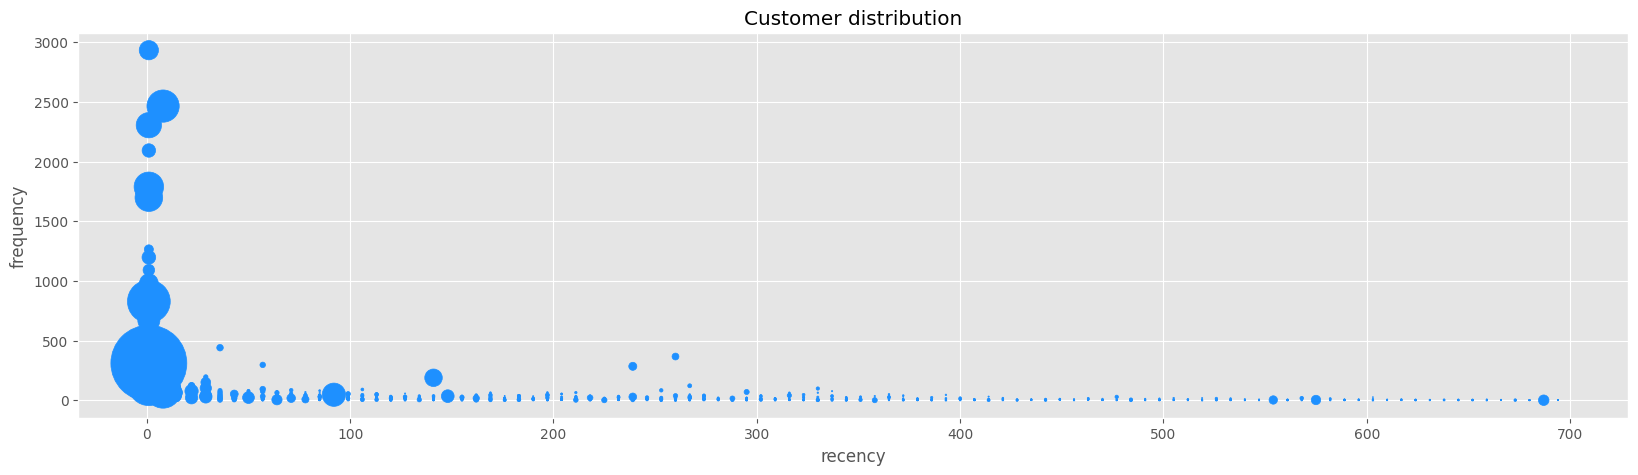

In [68]:
plt.style.use('ggplot')
RFM.plot.scatter(x='Recency', y='Frequency', s=RFM['Monetary']*5e-5, figsize=(20,5), c='dodgerblue')

#to save file locally
#plt.savefig("Customer Distribution.png")
#files.download("Customer Distribution.png")

plt.gca().set(xlabel='recency', ylabel='frequency', title='Customer distribution');

In [69]:
# We export the dataframe to a CSV file for later processing it in Power BI

RFM.to_csv('/content/sample_data/rfm_asia.csv', encoding='utf-8', index=False)